In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from preprocessing import *
from models import *

In [2]:
(train_X, train_y, test_X, test_y) = load_data()

In [3]:
# find hist features
feats = dict()
for feat in train_X.columns:
    fid = feat.split('_')[0]
    if(fid not in feats.keys()):
        feats[fid] = 1
    else:
        feats[fid] += 1
for fid in feats:
    if(feats[fid] > 1): 
        print("%s: %s" %(fid,feats[fid]))

ag: 10
az: 10
ba: 10
cn: 10
ay: 10
ee: 10
cs: 10


In [4]:
describe = train_X.describe()
describe

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


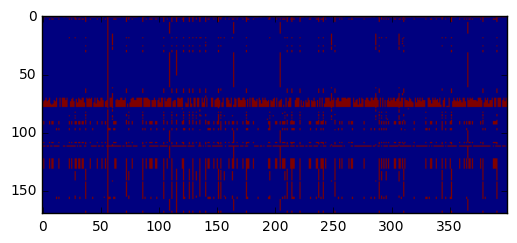

In [5]:
# an preview of missing values in the dataset
plt.imshow(train_X.iloc[0:400,:].isnull().values.T)
plt.show()

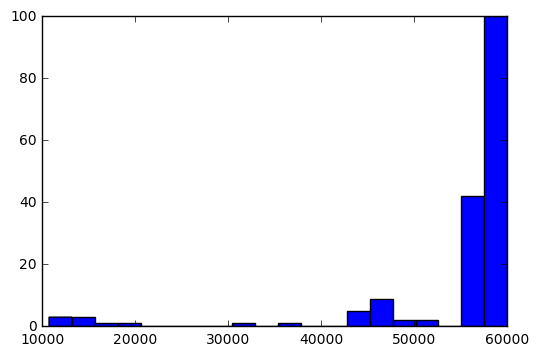

In [6]:
# distribution of missing values along features
plt.hist(describe.iloc[0],20)
plt.show()

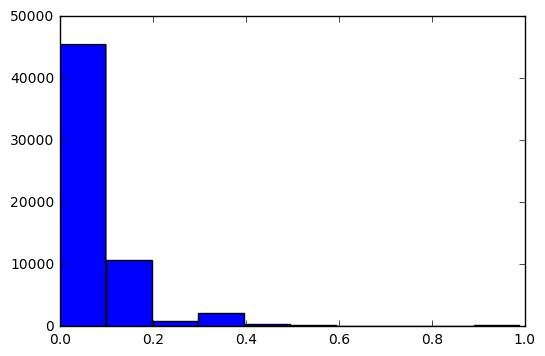

In [7]:
# distribution of the proportion of missing values in records
num_null = list(train_X.isnull().sum(axis=1)/train_X.shape[1])
plt.hist(num_null)
plt.show()

In [5]:
# preprocessing
nan_col = get_nan_col(train_X)
zero_col = []
# zero_col = get_zero_col(train_X)
col_remove = list(set(nan_col+zero_col))
X_tr, X_te = remove_columns(train_X, test_X, col_remove)
X_tr, X_te = imputation(X_tr, X_te,method='median')
# normalize distribution
quantile_transformer = sklearn.preprocessing.QuantileTransformer(random_state=0)
X_tr = quantile_transformer.fit_transform(X_tr)
X_te = quantile_transformer.transform(X_te)

y_tr, y_te = train_y.values, test_y.values


Features dropped: ['bq_000', 'ec_00', 'cr_000', 'cu_000', 'cy_000', 'bo_000', 'bk_000', 'bn_000', 'bm_000', 'cz_000', 'bp_000', 'cf_000', 'cl_000', 'cv_000', 'ad_000', 'co_000', 'bl_000', 'dc_000', 'ct_000', 'br_000', 'ch_000', 'db_000', 'da_000', 'cx_000', 'cm_000', 'cg_000', 'ed_000', 'ab_000'].


In [12]:
# X_tr.describe().T

Features dropped: ['ab_000', 'ed_000', 'cx_000', 'cg_000', 'ef_000', 'ay_009', 'dj_000', 'ct_000', 'af_000', 'eg_000', 'dz_000', 'dl_000', 'bl_000', 'cr_000', 'df_000', 'bq_000', 'ad_000', 'ay_000', 'cf_000', 'ay_001', 'ak_000', 'cm_000', 'ay_004', 'bm_000', 'au_000', 'db_000', 'ag_000', 'br_000', 'cl_000', 'ar_000', 'ag_001', 'cn_000', 'ay_002', 'ae_000', 'dc_000', 'az_009', 'ec_00', 'as_000', 'ch_000', 'bk_000', 'bo_000', 'ag_002', 'bn_000', 'dm_000', 'co_000', 'cz_000', 'bp_000', 'cv_000', 'cu_000', 'ay_003', 'dg_000', 'dk_000', 'da_000', 'az_008', 'cs_009', 'ea_000', 'cy_000'].


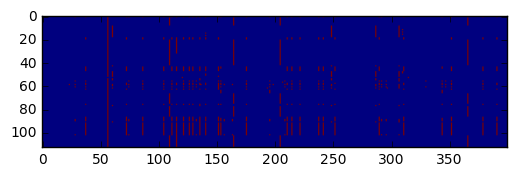

In [14]:
# distribution of null values after removing high-null columns (before imputation)
plt.imshow(remove_columns(train_X, test_X, col_remove)[0].iloc[0:400,:].isnull().values.T)
plt.show()

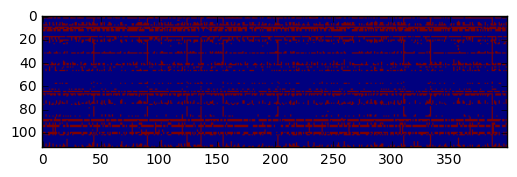

In [15]:
# distribution of 0-value after 
plt.imshow(X_tr.iloc[0:400,:].values.T == 0)
plt.show()

In [88]:
def total_cost(y_true, y_pred):
    FP = ((y_pred >  0) & (y_true == 0)).sum()
    FN = ((y_pred <= 0) & (y_true == 1)).sum()
    return 10 * FP + 500 * FN

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def evaluate(X, y, mdl):
    tcost = make_scorer(total_cost,greater_is_better=True)
    n_fold = 5
    return np.mean(cross_val_score(mdl, X, y, scoring=tcost, cv=n_fold,n_jobs=4))

Tune hyperparameter for CART

In [90]:
# Search for optimal hyperparam for decision tree, model evaluated using CV
scores = []
for min_leaf in [1,10,50,100,500]:
    scores.append(evaluate(X_tr.values, y_tr.values, DecisionTreeRegressor(min_samples_leaf = min_leaf)))
scores

[29734.0, 17856.0, 12886.0, 13196.0, 21528.0]

In [91]:
scores = []
for min_leaf in [40,50,60,70,80,90]:
    scores.append(evaluate(X_tr.values, y_tr.values, DecisionTreeRegressor(min_samples_leaf = min_leaf)))
scores

[13290.0, 12886.0, 12580.0, 12398.0, 12756.0, 13122.0]

In [95]:
scores = []
for depth in [10,20,30,50,None]:
    scores.append(evaluate(X_tr.values, y_tr.values, DecisionTreeRegressor(max_depth = depth, min_samples_leaf=70)))
scores

[118266.0, 33034.0, 12398.0, 12398.0, 12398.0]

In [15]:
# evaluate on test set
cart = DecisionTreeRegressor(min_samples_leaf=70,max_depth=30)
cart = cart.fit(X_tr, y_tr)
y_pred = cart.predict(X_te) 
print("Total_cost: %s" %total_cost(y_te, y_pred))
print("Precision: %s" %precision_score(y_te, y_pred>0))
print("Recall: %s" %recall_score(y_te, y_pred>0))

Total_cost: 18590
Precision: 0.271276595745
Recall: 0.952


Tune hyperparameter for RF

In [102]:
scores = []
for mf in ['sqrt','log2',0.3333,'auto']:
    scores.append(evaluate(X_tr.values, y_tr.values, RandomForestRegressor(n_estimators=100, max_features=mf, n_jobs=4)))
scores

[13066.0, 13614.0, 11628.0, 10894.0]

In [104]:
scores = []
for n_esti in [40,50,60,80,100]:
    print("%s" %n_esti)
    scores.append(evaluate(X_tr.values, y_tr.values, 
                           RandomForestRegressor(n_estimators=n_esti, max_features='auto', n_jobs=4)))
scores

40
50
60
80
100


[9502.0, 9726.0, 10098.0, 10642.0, 10894.0]

In [107]:
scores = []
for n_esti in [20,30]:
    print("%s" %n_esti)
    scores.append(evaluate(X_tr.values, y_tr.values, 
                           RandomForestRegressor(n_estimators=n_esti, max_features='auto', n_jobs=4)))
scores

20
30


[9228.0, 9216.0]

In [113]:
scores = []
for min_leaf in [30,40,50,60]:
    print("%s" %min_leaf)
    scores.append(evaluate(X_tr.values, y_tr.values, 
                          RandomForestRegressor(n_estimators=25, max_features='auto', min_samples_leaf=min_leaf, n_jobs=4)))
scores

30
40
50
60


[21338.0, 23956.0, 25992.0, 27944.0]

In [114]:
scores = []
for min_leaf in [10,20]:
    print("%s" %min_leaf)
    scores.append(evaluate(X_tr.values, y_tr.values, 
                          RandomForestRegressor(n_estimators=25, max_features='auto', min_samples_leaf=min_leaf, n_jobs=4)))
scores
# The optimal min_leaf is the default: 1

10
20


[14292.0, 18132.0]

In [70]:
# evaluate Random Forest on test set

RF = RandomForestRegressor(n_estimators=25, max_features='auto',min_samples_leaf=1, n_jobs=4)
RF = RF.fit(X_tr, y_tr)
y_pred = RF.predict(X_te)
#metrics(y_te.values, y_pred)
print(total_cost(y_te.values, y_pred))
print("Precision: %s" %precision_score(y_te, y_pred>0))
print("Recall: %s" %recall_score(y_te, y_pred>0))

12330
Precision: 0.383068783069
Recall: 0.965333333333


In [92]:
def total_cost(y_true, y_pred):
    FP = ((y_pred == 1) & (y_true == 0)).sum()
    FN = ((y_pred == 0) & (y_true == 1)).sum()
    return 10 * FP + 500 * FN

t = 0.01
print(total_cost(y_te.values, y_pred > t))
print("Precision: %s" %precision_score(y_te, y_pred>t))
print("Recall: %s" %recall_score(y_te, y_pred>t))

12330
Precision: 0.383068783069
Recall: 0.965333333333


In [57]:
# Other models

In [69]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l1', C=3,class_weight='balanced')
LR = LR.fit(X_tr, y_tr)
y_pred = LR.predict_proba(X_te)[:,1]
t = 0.5
print(total_cost(y_te.values, y_pred))
print("Precision: %s" %precision_score(y_te, y_pred>t))
print("Recall: %s" %recall_score(y_te, y_pred>t))

156250
Precision: 0.341929321872
Recall: 0.954666666667


In [61]:
from sklearn.naive_bayes import GaussianNB
prior = np.array([(y_tr==0).sum(), y_tr.sum()])/y_tr.shape[0]
gnb = GaussianNB(priors = prior )
y_pred = gnb.fit(X_tr, y_tr).predict(X_te)
print(total_cost(y_te.values, y_pred))
print("Precision: %s" %precision_score(y_te, y_pred>0))
print("Recall: %s" %recall_score(y_te, y_pred>0))

38550
Precision: 0.118443316413
Recall: 0.933333333333
